In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib.figure as fig

## Análise Base Completa

In [2]:
events = pd.read_csv('Data\events.csv')

In [3]:
print('Quantidade de Eventos: ' + str(len(events)))
print('Quantidade de Usuários Distintos: ' + str(len(events['userid'].unique())))
print('Quantidade de Produtos Distintos: ' + str(len(events['itemid'].unique())))

Quantidade de Eventos: 2756101
Quantidade de Usuários Distintos: 1407580
Quantidade de Produtos Distintos: 235061


In [4]:
events[['cart', 'sale', 'view']].sum()

cart      69332
sale      22457
view    2664312
dtype: int64

In [5]:
events[['cart', 'sale', 'view']].mean()

cart    0.025156
sale    0.008148
view    0.966696
dtype: float64

## Análise Usuários

In [6]:
gb_users = events.groupby(['userid'], as_index=False).sum()

gb_users[['cart', 'sale', 'view']].mean()

cart    0.049256
sale    0.015954
view    1.892832
dtype: float64

In [7]:
corr_view = round(gb_users['sale'].corr(gb_users['view']), 2)
corr_cart = round(gb_users['sale'].corr(gb_users['cart']), 2)                  

print('Correlação Vendas - Visualizações: \n' + str(corr_view))
print('\nCorrelação Vendas - Adição ao Carrinho: \n' + str(corr_cart))

Correlação Vendas - Visualizações: 
0.78

Correlação Vendas - Adição ao Carrinho: 
0.9


### Análise Compradores

In [8]:
buyers = gb_users[gb_users['sale'] > 0]

buyers_dict = {}
buyers_dict['1 Compra'] = buyers[buyers['sale'] == 1]['sale'].count()
buyers_dict['2 Compras'] = buyers[buyers['sale'] == 2]['sale'].count()
buyers_dict['3 Compras'] = buyers[buyers['sale'] == 3]['sale'].count()
buyers_dict['> 3 Compras'] = buyers[buyers['sale'] > 3]['sale'].count()

bd_keys = list(buyers_dict.keys())
bd_values = list(buyers_dict.values())

In [9]:
def addlabels(x,y,a):
    for i in range(len(x)):
        plt.text(i, y[i] + a, y[i], ha = 'center', color = 'black')

Quantidade de Compras          Quantidade de Usuários         Percentual                    
1 Compra                       9143                           78.02%                        
2 Compras                      1549                           13.22%                        
3 Compras                      435                            3.71%                         
> 3 Compras                    592                            5.05%                         


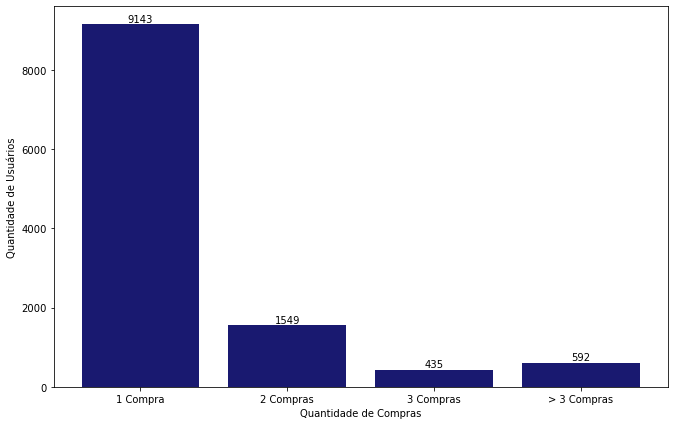

In [10]:
print ('{:<30} {:<30} {:<30}'.format('Quantidade de Compras', 'Quantidade de Usuários', 'Percentual'))
l = len(buyers)

for i in range(len(bd_keys)):
    print ('{:<30} {:<30} {:<30}'.format(bd_keys[i], bd_values[i], str(round(100*bd_values[i]/ l, 2)) + '%'))

plt.figure(figsize=(11,7))
plt.bar(range(len(buyers_dict)), list(buyers_dict.values()), align='center', color='midnightblue')
plt.xticks(range(len(buyers_dict)), list(buyers_dict.keys()))
addlabels(range(len(buyers_dict)), list(buyers_dict.values()), 70)
plt.ylabel('Quantidade de Usuários')
plt.xlabel('Quantidade de Compras')

plt.show()

In [11]:
views_dict = {}
views_dict['0 Compra'] = round(gb_users[gb_users['sale'] == 0]['view'].mean(), 2)
views_dict['1 Compra'] = round(gb_users[gb_users['sale'] == 1]['view'].mean(), 2)
views_dict['2 Compras'] = round(gb_users[gb_users['sale'] == 2]['view'].mean(), 2)
views_dict['3 Compras'] = round(gb_users[gb_users['sale'] == 3]['view'].mean(), 2)
views_dict['> 3 Compras'] = round(gb_users[gb_users['sale'] > 3]['view'].mean(), 2)

vd_keys = list(views_dict.keys())
vd_values = list(views_dict.values())

Quantidade de Compras          Média de Visualizações        
0 Compra                       1.78                          
1 Compra                       6.09                          
2 Compras                      14.31                         
3 Compras                      20.07                         
> 3 Compras                    159.16                        


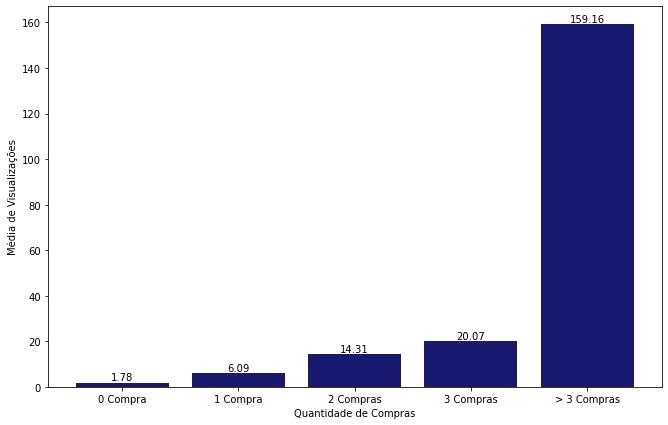

In [12]:
print ('{:<30} {:<30}'.format('Quantidade de Compras', 'Média de Visualizações'))
l = len(buyers)

for i in range(len(vd_keys)):
    print ('{:<30} {:<30}'.format(vd_keys[i], vd_values[i]))

plt.figure(figsize=(11,7))
plt.bar(range(len(views_dict)), list(views_dict.values()), align='center', color='midnightblue')
plt.xticks(range(len(views_dict)), list(views_dict.keys()))
addlabels(range(len(views_dict)), list(views_dict.values()), 1)
plt.ylabel('Média de Visualizações')
plt.xlabel('Quantidade de Compras')

plt.show()

In [13]:
cart_dict = {}
cart_dict['0 Compra'] = round(gb_users[gb_users['sale'] == 0]['cart'].mean(), 2)
cart_dict['1 Compra'] = round(gb_users[gb_users['sale'] == 1]['cart'].mean(), 2)
cart_dict['2 Compras'] = round(gb_users[gb_users['sale'] == 2]['cart'].mean(), 2)
cart_dict['3 Compras'] = round(gb_users[gb_users['sale'] == 3]['cart'].mean(), 2)
cart_dict['> 3 Compras'] = round(gb_users[gb_users['sale'] > 3]['cart'].mean(), 2)

cd_keys = list(cart_dict.keys())
cd_values = list(cart_dict.values())

Quantidade de Compras          Média de Adições ao Carrinho  
0 Compra                       0.03                          
1 Compra                       1.08                          
2 Compras                      2.43                          
3 Compras                      4.22                          
> 3 Compras                    20.27                         


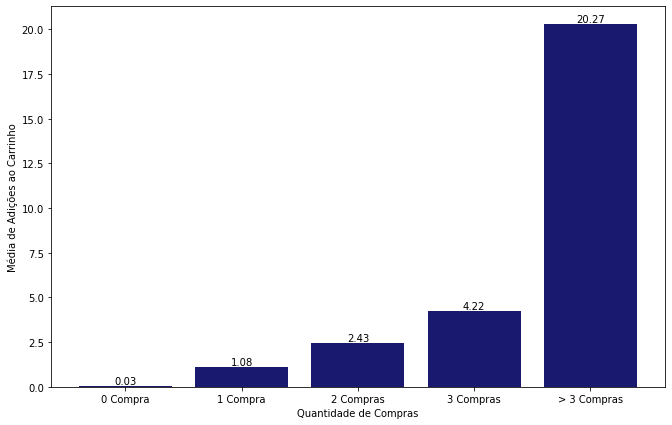

In [14]:
print ('{:<30} {:<30}'.format('Quantidade de Compras', 'Média de Adições ao Carrinho'))
l = len(buyers)

for i in range(len(cd_keys)):
    print ('{:<30} {:<30}'.format(cd_keys[i], cd_values[i]))

plt.figure(figsize=(11,7))
plt.bar(range(len(cart_dict)), list(cart_dict.values()), align='center', color='midnightblue')
plt.xticks(range(len(cart_dict)), list(cart_dict.keys()))
addlabels(range(len(cart_dict)), list(cart_dict.values()), 0.15)
plt.ylabel('Média de Adições ao Carrinho')
plt.xlabel('Quantidade de Compras')

plt.show()

## Similaridades Compras Bases Treinamento e Teste

In [15]:
train = pd.read_csv('Data/train_binario.csv')
test = pd.read_csv('Data/test_binario.csv')

In [16]:
gb_train = train.groupby(['userid', 'itemid'], as_index=False).sum()
gb_test = test.groupby(['userid', 'itemid'], as_index=False).sum()

gb_train_buyers = gb_train[gb_train['sale'] > 0]
gb_test_buyers = gb_test[gb_test['sale'] > 0]

In [17]:
train_users = gb_train_buyers['userid'].unique()
test_users = gb_test_buyers['userid'].unique()

qtd_train_users = len(train_users)
qtd_test_users = len(test_users)
qtd_users_inter = len(set(train_users).intersection(test_users))

print('Quantidade de Usuários Treinamento: ' + str(qtd_train_users))
print('Quantidade de Usuários Teste: ' + str(qtd_test_users))
print('Quantidade de Usuários em Comum: ' + str(qtd_users_inter))
print('Percentual de Usuário Teste em Comum: ' + str(round(qtd_users_inter / qtd_test_users, 3) * 100) + '%')

Quantidade de Usuários Treinamento: 9337
Quantidade de Usuários Teste: 2475
Quantidade de Usuários em Comum: 93
Percentual de Usuário Teste em Comum: 3.8%


In [18]:
train_items = gb_train_buyers['itemid'].unique()
test_items = gb_test_buyers['itemid'].unique()

qtd_train_items = len(train_items)
qtd_test_items = len(test_items)
qtd_items_inter = len(set(train_items).intersection(test_items))

print('Quantidade de Items Treinamento: ' + str(qtd_train_items))
print('Quantidade de Items Teste: ' + str(qtd_test_items))
print('Quantidade de Items em Comum: ' + str(qtd_items_inter))
print('Percentual de Items Teste em Comum: ' + str(round(qtd_items_inter / qtd_test_items, 3) * 100) + '%')

Quantidade de Items Treinamento: 10081
Quantidade de Items Teste: 3295
Quantidade de Items em Comum: 1351
Percentual de Items Teste em Comum: 41.0%
